In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Zadanie 1

In [2]:
print(7/100 * 100 - 7)

8.881784197001252e-16


Przyczyną błędu jest binarna arytmetyka zmiennoprzecinkowa, tak samo:

In [3]:
0.1 + 0.1 + 0.1 == 0.3

False

In [4]:
f"{0.1:.80f}"

'0.10000000000000000555111512312578270211815834045410156250000000000000000000000000'

Wynika to z faktu, że nie każdą liczbę zmiennoprzecinkową da się zapisać jako ułamek o podstawie 2 (np. jest to ułamek okresowy). Dlatego języki progroamowania korzystają z przybliżeń tych liczb co prowadzi do błędów.

# Zadanie 2

$$ e^x = \lim_{x \to \infty} \sum_{i=0}^{N} \frac{x^i}{i!}$$

Dane wejściowe z treści zadania:

In [5]:
x = [10, 2, -2, -10]
N = 60

Funkcja zwracająca wartość $$ e^x $$ dla zadanego x oraz N:

In [6]:
def exponential(x, n):
    sum = 0
    for i in range(0,n+1):
        sum += (x**i)/math.factorial(i)
    return sum

In [7]:
print('10', exponential(10,60))
print('2' ,exponential(2,60))
print('-2', exponential(-2,60))
print('-10', exponential(-10,60))

10 22026.46579480671
2 7.389056098930649
-2 0.13533528323661276
-10 4.5399929433607724e-05


Funkcja odpowiedzialna za zwracanie błędu względnego:

In [7]:
def re_err(x, N):
    exact_value = math.exp(x)
    partial_sums = [exponential(x, n) for n in range(N)]
    relative_errors = [abs((exact_value - S) / exact_value) for S in partial_sums]
    return relative_errors

wykres:

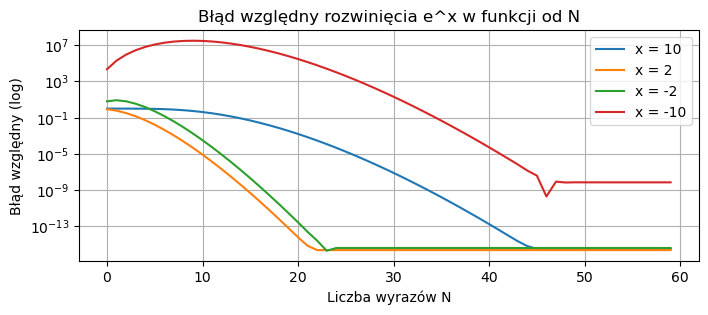

In [8]:
plt.figure(figsize=(8, 3))
for i in x:
    error = re_err(i, N)
    plt.plot(range(N), error, label=f'x = {i}')

plt.yscale('log')
plt.title('Błąd względny rozwinięcia e^x w funkcji od N')
plt.xlabel('Liczba wyrazów N')
plt.ylabel('Błąd względny (log)')
plt.legend()
plt.grid()
plt.show()

Dla x < 0, wyrazy $ \frac{x^i}{i!} $ są na przemian dodatnie i ujemne. Przy coraz mniejszych wartościach wyrazów $ \frac{x^i}{i!} $, które dodatkowo są różnych znaków prowadzi to do coraz gorszego zaokrąlania sumy, co z kolei prowadzi do utraty precyzji numerycznej.
Funkcja exp z biblioteki math używa np aproksymacji Padé: Zamiast bezpośrednio sumować: $$ e^x = \lim_{x \to \infty} \sum_{i=0}^{N} \frac{x^i}{i!}$$
funkcja exp stosuje: $ e^x = 2^{ipart} * e^{fpart} $, gdzie ipart - część całkowita, fpart - część ułamkowa.
Takie przybliżenie jest dokładniejsze bo minimalizuje błąd numeryczny dla większych wartości fpart. Jako fpart brany jest stosunek dwóch wielomianów $$ R(x) = \frac{P_n(x)}{Q_m(x)} $$
taki, że funkcja $P_n(x)$ oraz $Q_m(x)$ są wyznaczane tak, aby przybliżały funkcję $f(x)$  w okolicach $x=0$ w sposób jak najbardziej dokładny

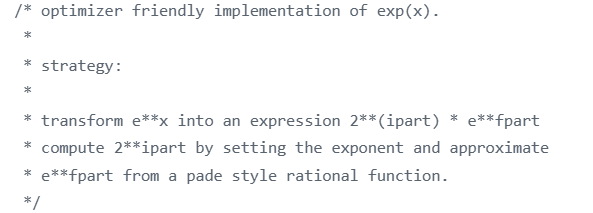

# Zadanie 3

In [9]:
import sys

In [10]:
x = 9.8**201
y = 10.2**199

$ z = \sqrt{(x^2+y^2)}\$

In [11]:
out = math.sqrt(x**2+y**2)

OverflowError: (34, 'Result too large')

In [ ]:
sys.getsizeof(int())

$ z = y\sqrt{(\frac{x}{y}\)^2+1}\$

In [ ]:
out = y * math.sqrt((x/y)**2+1)
print(out)

# Zadanie 4

In [12]:
import random

In [13]:
a = c = 1
b = [random.randint(int(10**7.4),int(10**8.5)) for i in range(100)]

## Wzór I

$ x_1,x_2 = \frac{1}{2a}(-b \pm sign(b)\sqrt{b^2-4ac})$

In [14]:
results_1 = {}
for b_1 in b:
    x1= (1/(2*a))*(-b_1 + np.sign(x)*math.sqrt(b_1**2-4*a*c))
    x2= (1/(2*a))*(-b_1 - np.sign(x)*math.sqrt(b_1**2-4*a*c))
    val = [x1,x2]
    results_1[b_1] = val

In [15]:
print(results_1)

{218050404: [0.0, -218050404.0], 91096362: [-7.450580596923828e-09, -91096362.0], 282363967: [0.0, -282363967.0], 33143719: [-2.9802322387695312e-08, -33143718.99999997], 138425285: [-1.4901161193847656e-08, -138425285.0], 134148117: [-7.450580596923828e-09, -134148117.0], 116759393: [-7.450580596923828e-09, -116759393.0], 124692622: [-7.450580596923828e-09, -124692622.0], 214444618: [0.0, -214444618.0], 238216654: [0.0, -238216654.0], 309208395: [0.0, -309208395.0], 79006857: [-1.4901161193847656e-08, -79006856.99999999], 222426965: [0.0, -222426965.0], 218942175: [0.0, -218942175.0], 153089073: [-1.4901161193847656e-08, -153089073.0], 79365426: [-1.4901161193847656e-08, -79365425.99999999], 144879222: [0.0, -144879222.0], 160275743: [-1.4901161193847656e-08, -160275743.0], 293004772: [0.0, -293004772.0], 119360888: [-7.450580596923828e-09, -119360888.0], 140764473: [-1.4901161193847656e-08, -140764473.0], 201903070: [0.0, -201903070.0], 29704430: [-3.3527612686157227e-08, -29704429.9

## Wzór II

$ x_1 = \frac{1}{2a}(-b - sign(b)\sqrt{b^2-4ac})$ <br>
$x_2 = \frac{c}{ax_1} $

In [16]:
results_2 = {}
for b_1 in b:
    x1 = (1/(2*a))*(-b_1 - np.sign(b_1)*math.sqrt(b_1**2-4*a*c))
    x2 = 1/x1
    val = [x1,x2]
    results_2[b_1] = val

In [17]:
print(results_2)

{218050404: [-218050404.0, -4.58609560750917e-09], 91096362: [-91096362.0, -1.0977386780824463e-08], 282363967: [-282363967.0, -3.5415283707216082e-09], 33143719: [-33143718.99999997, -3.017162920069413e-08], 138425285: [-138425285.0, -7.2241137159298605e-09], 134148117: [-134148117.0, -7.45444678884311e-09], 116759393: [-116759393.0, -8.564621434782554e-09], 124692622: [-124692622.0, -8.019720685639283e-09], 214444618: [-214444618.0, -4.663208661175167e-09], 238216654: [-238216654.0, -4.1978593150754275e-09], 309208395: [-309208395.0, -3.234064844843556e-09], 79006857: [-79006856.99999999, -1.2657129241326486e-08], 222426965: [-222426965.0, -4.495857775157792e-09], 218942175: [-218942175.0, -4.567416031196365e-09], 153089073: [-153089073.0, -6.532144851383351e-09], 79365426: [-79365425.99999999, -1.2599944968480358e-08], 144879222: [-144879222.0, -6.902301007662782e-09], 160275743: [-160275743.0, -6.239247320163726e-09], 293004772: [-293004772.0, -3.412913698211031e-09], 119360888: [-

Lepiej używać II wzoru.